In [4]:
import seaborn as sns

In [5]:
df = sns.load_dataset("penguins")

In [6]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [8]:
len(df)

344

In [ ]:
df.info()

## Missing Values

In [11]:
from matplotlib import pyplot as plt
missing_data_size = df.isnull().sum()
missing_data_columns = (
    (
        missing_data_size[missing_data_size > 0]
    )
    .sort_values(ascending=False)
    .to_frame(name='Count')
)
missing_data_columns = (
    missing_data_columns.assign(
        Column=missing_data_columns.index
    )
).reset_index(drop=True)

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

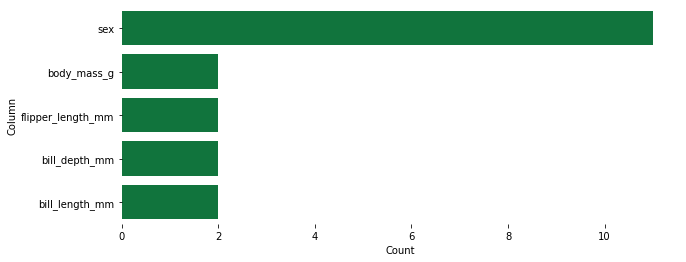

In [19]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(data=missing_data_columns, x='Count', y='Column', color="#00853B")
sns.despine(left=True, bottom=True)
ax.bar_label(ax.containers[0], labels=[f"{i:.2f} %" for i in missing_data_columns.Count.astype(int) / len(df) * 100])
plt.suptitle("Missing data distribuition", ha='left', va='top', x=-.1, fontweight='bold')
plt.show()

In [13]:
for column in missing_data_columns.Column:
    indexes = list(df[df[column].isnull()].index)
    print(f'{column}: {indexes}')

sex: [3, 8, 9, 10, 11, 47, 246, 286, 324, 336, 339]
body_mass_g: [3, 339]
flipper_length_mm: [3, 339]
bill_depth_mm: [3, 339]
bill_length_mm: [3, 339]


In [14]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [15]:
df.loc[df["sex"].isna() == True]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [20]:
df.median()

bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [22]:
df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,MALE


In [23]:
df.mode().squeeze()

species              Adelie
island               Biscoe
bill_length_mm         41.1
bill_depth_mm            17
flipper_length_mm       190
body_mass_g            3800
sex                    MALE
Name: 0, dtype: object

In [25]:
df.mean()

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

In [26]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [31]:
df.fillna(df.mean(), inplace = True)

In [32]:
df.isna().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [33]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
